In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("3-customersatisfaction.csv")

In [4]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
df.describe()

,Customer Satisfaction,Incentive
count,100.000000,100.000000
mean,-0.005427,3.445220
std,1.721792,2.911818
min,-2.992863,-1.068081
25%,-1.431357,1.471341
50%,0.109167,2.748839
75%,1.421119,4.739113
max,2.986736,11.000056


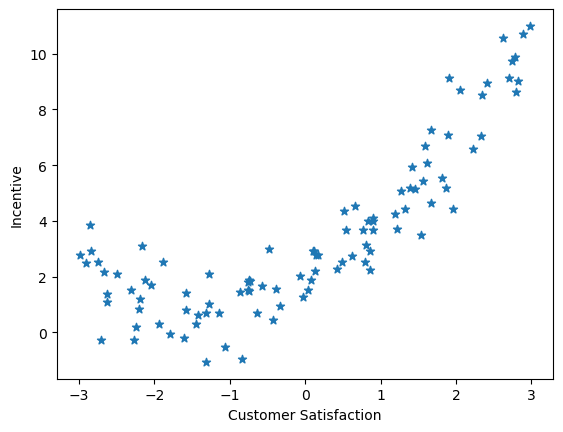

In [9]:
plt.scatter(x="Customer Satisfaction",y="Incentive",marker="*",data=df)
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [10]:
#features , target (X,y)
X=df[["Customer Satisfaction"]]
y=df["Incentive"]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [12]:
X_train.count()

Customer Satisfaction    80
dtype: int64

In [13]:
X_test.count()

Customer Satisfaction    20
dtype: int64

In [14]:
#Scale

In [15]:
scale=StandardScaler()

In [16]:
X_train=scale.fit_transform(X_train)
X_test =scale.transform(X_test)

In [17]:
regression= LinearRegression()

In [18]:
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
y_predict=regression.predict(X_test)
y_predict

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

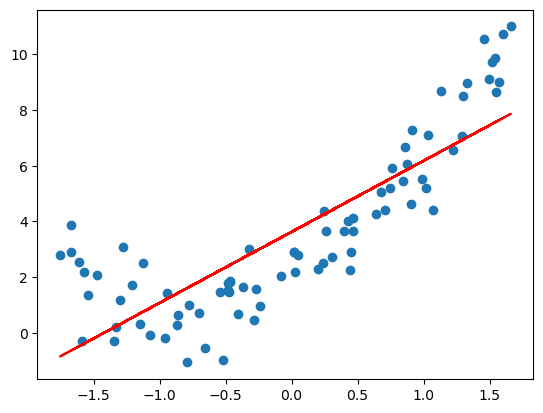

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r")
plt.show()
# predict edilen çizgi bizim verilerle neredeyse hiç çakışmıyor


In [21]:
score = r2_score(y_test,y_predict)
score #score çok köötü çünkü bizim verirmiz poli ama biz lineer çizdirdik

0.2705652535622243

In [22]:
poly = PolynomialFeatures()

In [23]:
X_train_poly= poly.fit_transform(X_train)
X_test_poly =poly.transform(X_test)

In [24]:
regression_poly = LinearRegression()
regression_poly.fit(X_train_poly,y_train)


LinearRegression()

In [25]:
# 1. Calculate Training Score (Did it learn?)
# We use X_train_poly AND y_train
y_pred_train = regression_poly.predict(X_train_poly)
train_score = r2_score(y_train, y_pred_train)

# 2. Calculate Test Score (Can it generalize?)
# We use X_test_poly AND y_test
y_pred_test = regression_poly.predict(X_test_poly)
test_score = r2_score(y_test, y_pred_test)

print(f"Training Score: {train_score:.4f}")
print(f"Test Score:     {test_score:.4f}")

Training Score: 0.9036
Test Score:     0.7686


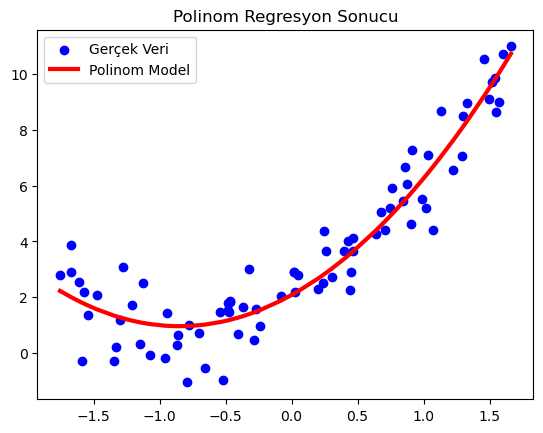

In [26]:
import operator

# 1. Gerçek Veriyi Çiz (Noktalar - Dağınık olabilir, sorun yok)
# X eksenine X_train (orijinal veri), Y eksenine y_train koyuyoruz
plt.scatter(X_train, y_train, color="blue", label="Gerçek Veri")

# 2. Tahmin Çizgisini Çiz (Sıralı Olmalı!)
# Veriyi ve tahminleri birbirine bağlayıp, X'e göre sıralayacağız.
# Yoksa çizgi zikzak çizer.

# X_train ve tahminleri birleştirip sıralıyoruz
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train, regression_poly.predict(X_train_poly)), key=sort_axis)
X_train_sorted, y_pred_sorted = zip(*sorted_zip)

# Şimdi sıralanmış veriyi çizdiriyoruz
plt.plot(X_train_sorted, y_pred_sorted, color="red", linewidth=3, label="Polinom Model")

plt.title("Polinom Regresyon Sonucu")
plt.legend()
plt.show()


In [27]:
#new data 

In [28]:
new_df=pd.read_csv("3-newdatas.csv")

In [29]:
new_df.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [30]:
new_df.rename(columns={"0":"Customer Satisfaction"},inplace=True)

In [31]:
new_df.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [32]:
X_new = new_df[["Customer Satisfaction"]]


In [33]:
X_new=scale.fit_transform(X_new)

In [34]:
X_new_poly = poly.transform(X_new)

In [35]:
y_new = regression_poly.predict(X_new_poly)

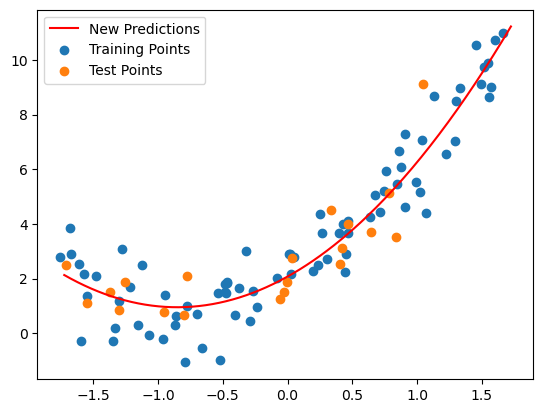

In [36]:
plt.plot(X_new, y_new, "r", label="New Predictions")
plt.scatter(X_train, y_train, label="Training Points")
plt.scatter(X_test, y_test, label="Test Points")
plt.legend()
plt.show()

In [37]:
#pipeline 

In [40]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standard_scaler", scaler),
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="New Predictions")
    plt.scatter(X_train, y_train, label="Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()